In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
reader = csv.reader(open("/content/Drive/MyDrive/Cardio vascular dataset/cardiovascular_diseases_dv3.csv", "r"), delimiter=';')
writer = csv.writer(open("/home/cardiovascular_diseases_dv3.csv", 'w'), delimiter=',')
writer.writerows(reader)

In [ ]:
df = pd.read_csv("/home/cardiovascular_diseases_dv3.csv")
df.head(10)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
5,60,1,151,67,120,80,2,2,0,0,0,0
6,61,1,157,93,130,80,3,1,0,0,1,0
7,62,2,178,95,130,90,3,3,0,0,1,1
8,48,1,158,71,110,70,1,1,0,0,1,0
9,54,1,164,68,110,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68564 entries, 0 to 68563
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68564 non-null  int64
 1   GENDER             68564 non-null  int64
 2   HEIGHT             68564 non-null  int64
 3   WEIGHT             68564 non-null  int64
 4   AP_HIGH            68564 non-null  int64
 5   AP_LOW             68564 non-null  int64
 6   CHOLESTEROL        68564 non-null  int64
 7   GLUCOSE            68564 non-null  int64
 8   SMOKE              68564 non-null  int64
 9   ALCOHOL            68564 non-null  int64
 10  PHYSICAL_ACTIVITY  68564 non-null  int64
 11  CARDIO_DISEASE     68564 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [ ]:
X = df.drop("CARDIO_DISEASE", axis = 1)
Y = df['CARDIO_DISEASE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle = True)

In [ ]:
model=DecisionTreeClassifier(random_state = 13)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [ ]:
prediction_test = model.predict(X_test)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.6317363086122657


In [ ]:
#augmenter l'Accuracy
param_grid = [
              {
               
               'max_depth' : list(range(3,15)),
               'criterion' :['gini', 'entropy']},
                       
                       ]

In [ ]:
optimal_params = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

In [ ]:
optimal_params.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                  

In [ ]:
print(optimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [ ]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=13)

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [ ]:
prediction_test2 = model2.predict(X_test)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test2))

Accuracy =  0.7334645956391745


In [ ]:
#sauvegarder le modele
filename = '/content/Drive/MyDrive/Cardio vascular models/model decision tree with cross vaidation acc_73_346.sav'
pickle.dump(model2, open(filename, 'wb'))

In [ ]:
#Matrice de confusion 
cm = metrics.confusion_matrix(y_test,prediction_test2)
print(cm)

[[5809 1216]
 [2439 4249]]


In [ ]:
# Installez le package pydotplus dans le noyau
!pip install pydotplus

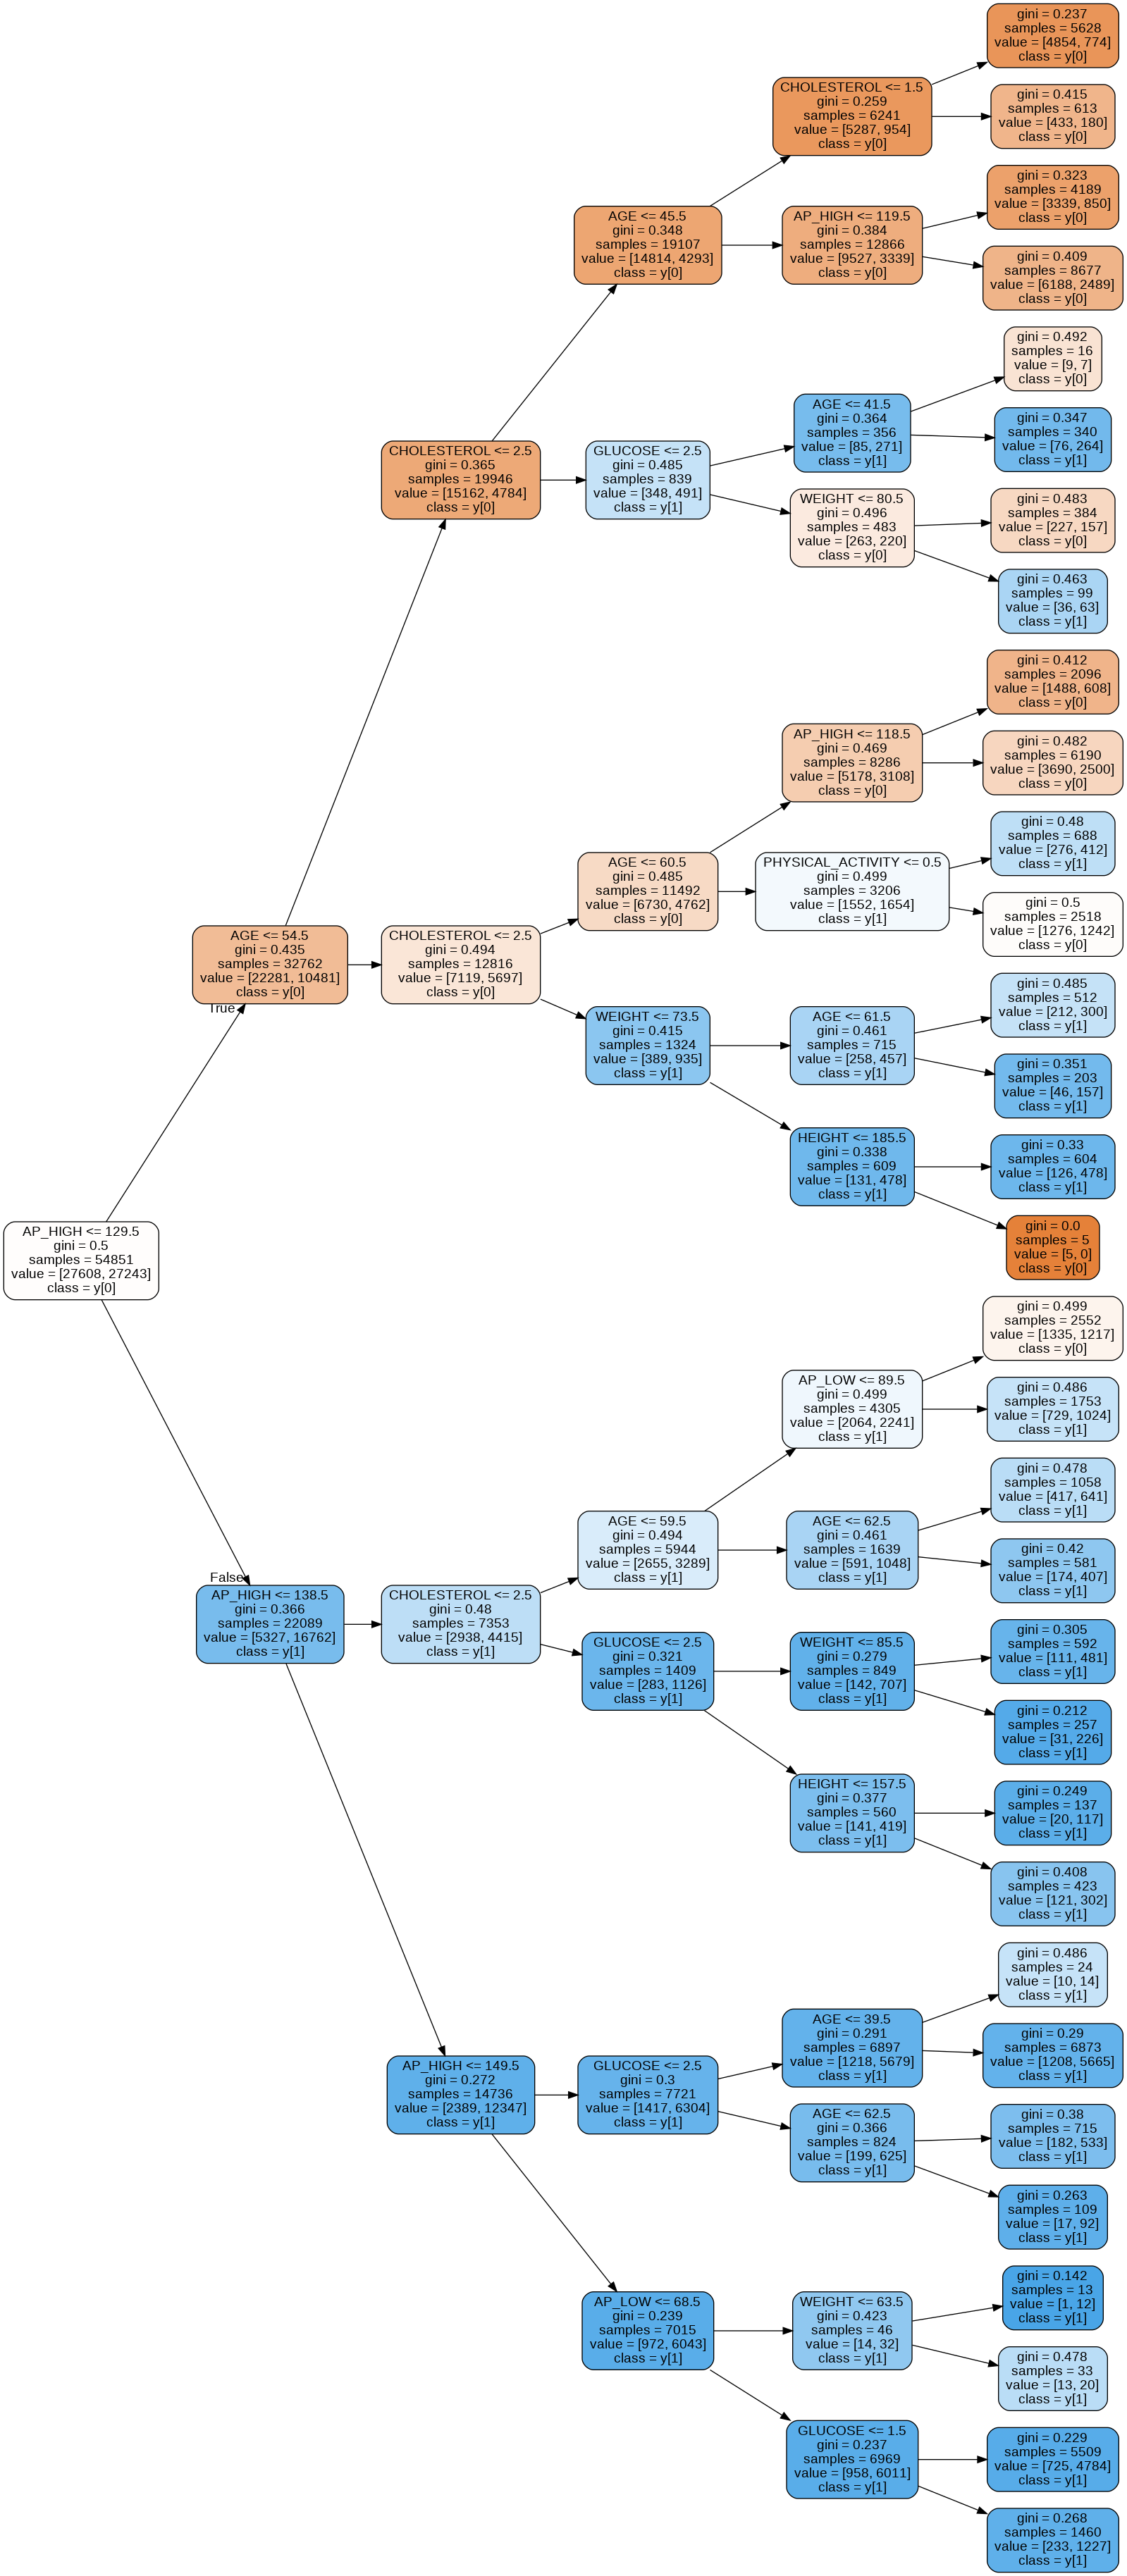

In [ ]:
# Tracez le modèle d'arbre de décision créé avec X_train, y_train
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

dot_data = StringIO()

export_graphviz(model2, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X.columns,
                class_names=True,
                rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())